# CEE 498: Transportation Economics
## Assignment One
### Noah Garfinkle (garfink2@illinois edu)
### 05 February 2020

## 0. References and Works Cited

|Link|Notes|
|---|---|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html|Scipy Lognormal Distribution|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html|Scipy Logistic Distribution|

## 1. Imports and Config

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic, lognorm
from scipy import integrate

## 2. Parameters

In [2]:
λ = 500 # pax
σ = 0.5
μ = 1.0

# Problem 3

In [3]:
c = 1.0
α1 = 10.0
α2 = 5.0
β1 = 2.0
β2 = 1.25

In [4]:
def q(p,α,β):
    demand = α-β*p
    return demand

Plot demands for a range of P

In [5]:
Ps = np.linspace(0,10,100)

In [6]:
q1 = [q(P,α1,β1) for P in Ps]

In [7]:
q2 = [q(P,α2,β2) for P in Ps]

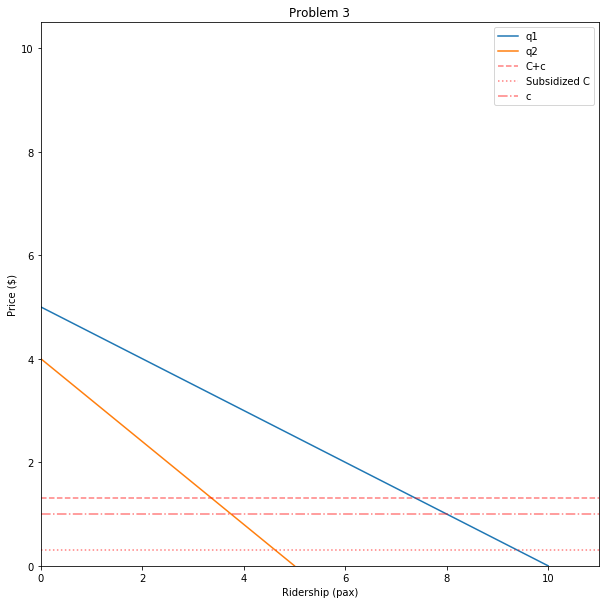

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1")
ax.plot(q2,Ps,label="q2")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3")

ax.axhline(1.3,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(0.3,label="Subsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Problem 3a.

In [9]:
C=0.3

In [10]:
q(c+C,α1,β1)

7.4

In [11]:
q(c,α2,β2)

3.75

Problem 3b.

In [12]:
C=3.0

In [13]:
q(c+C,α1,β1)

2.0

In [14]:
q(c+C,α2,β2)

0.0

In [15]:
qt = np.array(q1) + np.array(q2)

In [16]:
qt = [q(P,α1+α2,(β1+β2)/2) for P in Ps]

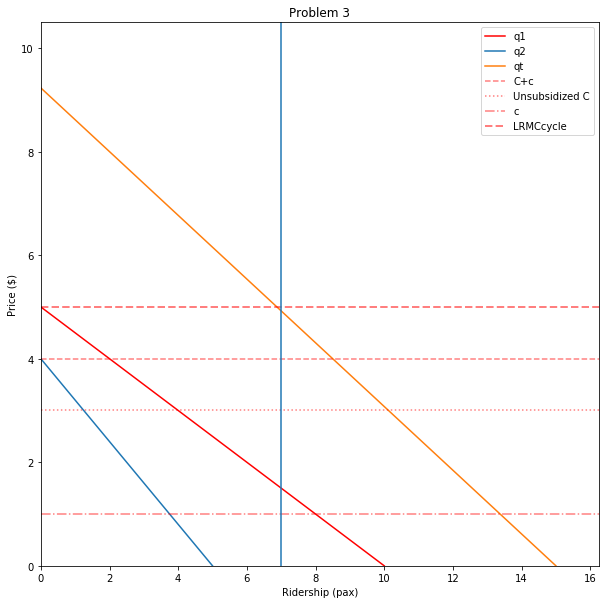

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1",color='red')
ax.plot(q2,Ps,label="q2")
ax.plot(qt,Ps,label="qt")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3")

ax.axhline(4.0,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(3.0,label="Unsubsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")
ax.axhline(5,label="LRMCcycle",ls="--",alpha=0.5,color='red',lw=2)

ax.axvline(7)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [18]:
10/3.25

3.076923076923077

# Problem 4

In [19]:
λ = 500 # pax
# L is the trip length in km
# V is the gross benefit in $

In [20]:
# distribution of trip length is lognormally distributed
# with scale parameter of 0.5 and shape parameter of 1

In [21]:
L = lognorm(s=1.0,scale=0.5)

Text(0, 0.5, 'P(L<l)')

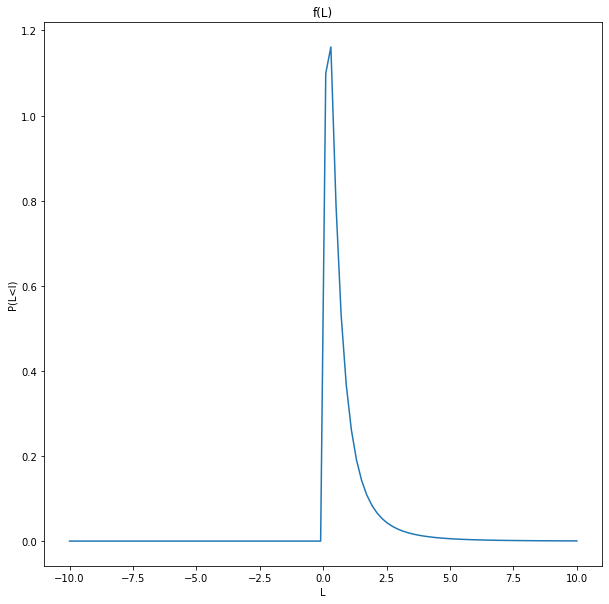

In [22]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, L.pdf(x))
ax.set_title("f(L)")
ax.set_xlabel("L")
ax.set_ylabel("P(L<l)")

In [23]:
# Gross benefit is dsitributed with logistic distribution with
# location parameter 1.5

In [24]:
V = logistic(loc=1.5)

Text(0, 0.5, 'P(V<v)')

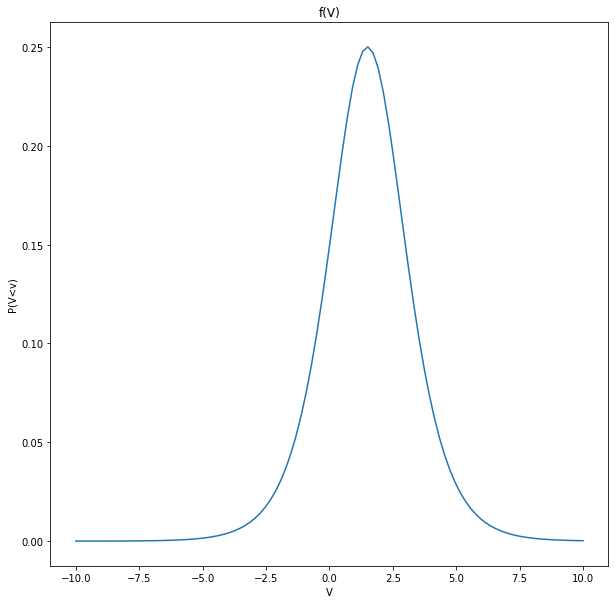

In [25]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, V.pdf(x))
ax.set_title("f(V)")
ax.set_xlabel("V")
ax.set_ylabel("P(V<v)")

In [10]:
# joint probability is multiplied since independent

In [163]:
# utility is v-lp

In [174]:
p = np.linspace(0.1,1,100)

In [177]:
f = lambda y,x: V.pdf(p)-L.pdf(p)*p

In [182]:
integrate.dblquad(f,0,np.inf,lambda x: p*L.pdf(x), lambda x: np.inf)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# solve for v = lp

In [183]:
# example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)[0]

0.6666666666666667

# THIS WORKS!!!!!

In [34]:
p=0.1

In [29]:
f = lambda v,l: V.pdf(v)*L.pdf(l)

In [30]:
integrate.dblquad(f,0,np.inf,lambda l:p*l, lambda l:np.inf)[0]

0.8044325331708547

In [35]:
integrate.dblquad(f,0,np.inf,lambda x:p*x, lambda x:np.inf)[0]

0.8044325331708547

In [31]:
ps = np.linspace(0.1,1,10)

In [32]:
results = []
for p in ps:
    result = integrate.dblquad(f,0,np.inf,lambda l:p*l, lambda l:np.inf)[0] * λ
    results.append(result)

Text(0.5, 0, 'Demand (pax)')

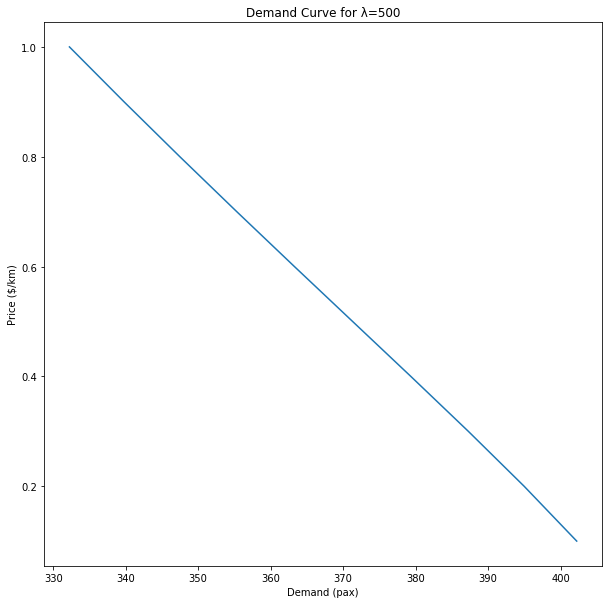

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(results,ps,label="demand curve")
ax.set_title("Demand Curve for λ=500")
ax.set_ylabel("Price ($/km)")
ax.set_xlabel("Demand (pax)")

In [ ]:
# this is the end of my test area

Text(0.5, 0, 'Demand (pax)')

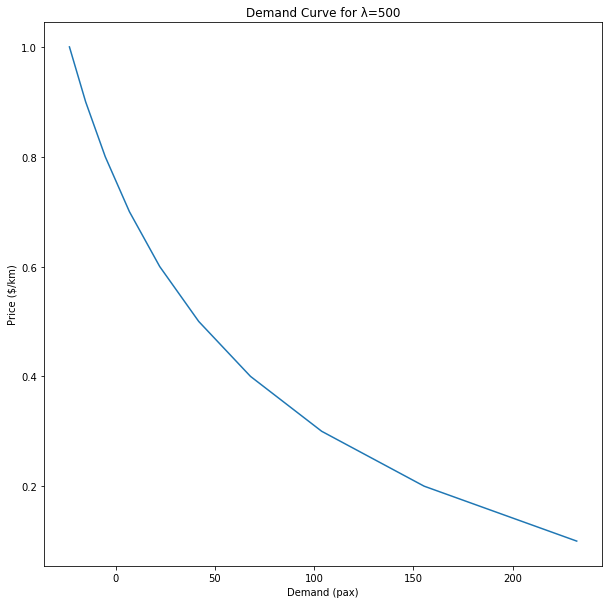

In [225]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(results,ps,label="demand curve")
ax.set_title("Demand Curve for λ=500")
ax.set_ylabel("Price ($/km)")
ax.set_xlabel("Demand (pax)")

# BELOW THIS BE DRAGONS.  CLEAN UP

In [207]:
f = lambda l,v :L.pdf(l)*V.pdf(v)

In [205]:
integrate.dblquad(f,0,np.inf,lambda v:0,lambda v:np.inf)

(0.8175744762574803, 1.456380903819648e-08)

In [209]:
integrate.dblquad(f,0,np.inf,lambda x:p*y,lambda v:np.inf)

NameError: name 'y' is not defined

In [203]:
integrate.dblquad(f,0,np.inf,lambda y:p*x,lambda y:np.inf)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()